
QFT Quantum Circuit:


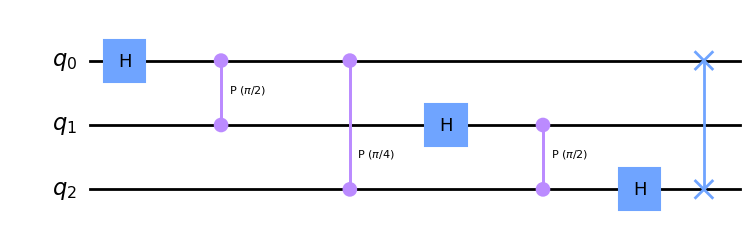


Statevector after QFT:


Matrix([
[0.3536],
[0.3536],
[0.3536],
[0.3536],
[0.3536],
[0.3536],
[0.3536],
[0.3536]])

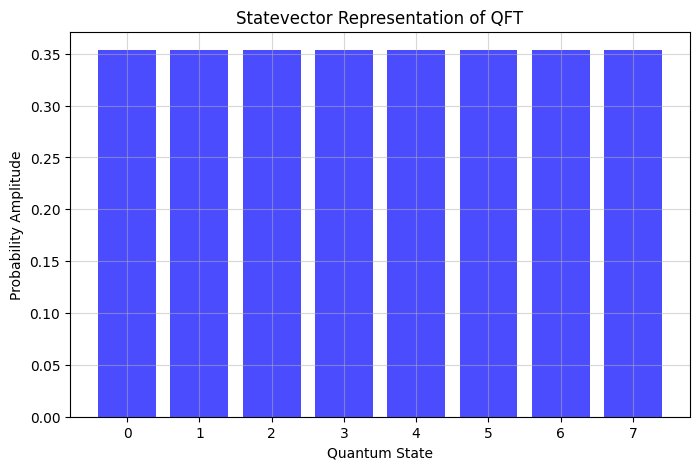

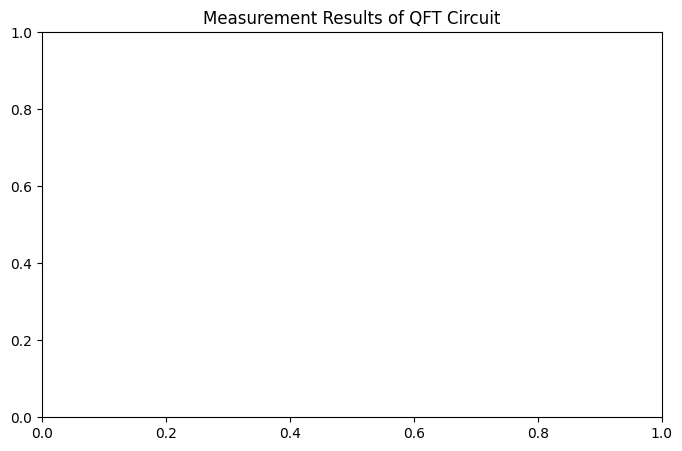

In [1]:
#-------------------------------------------------------------------------
# QFT Circuit with Visualization
# Chapter 8 in the QUANTUM COMPUTING AND QUANTUM MACHINE LEARNING BOOK
#-------------------------------------------------------------------------
# Version 1.0
# (c) 2025 Jesse Van Griensven, Roydon Fraser, and Jose Rosas 
# License:  MIT - Citation of this work required
#-------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, Aer, transpile, execute
from qiskit.visualization import plot_histogram, circuit_drawer
#-------------------------------------------------------------------------

def sprint(Matrix, decimals=4):
    """ Prints a Matrix with real and imaginary parts rounded to 'decimals' """
    import sympy as sp
    SMatrix = sp.Matrix(Matrix)  # Convert to Sympy Matrix if it's not already

    def round_complex(x):
        """Round real and imaginary parts of x to the given number of decimals."""
        c = complex(x)  # handle any real or complex Sympy expression
        r = round(c.real, decimals)
        i = round(c.imag, decimals)
        # If imaginary part is negligible, treat as purely real
        if abs(i) < 10**(-decimals): return sp.Float(r)
        else: return sp.Float(r) + sp.Float(i)*sp.I

    # Display the rounded Sympy Matrix
    display(SMatrix.applyfunc(round_complex))
    return

#-------------------------------------------------------------------------
# Visualization Functions
#-------------------------------------------------------------------------

def plot_quantum_circuit(qc):
    """ Function to plot quantum circuit """
    print("\nQFT Quantum Circuit:")
    display(circuit_drawer(qc, output='mpl', style={'backgroundcolor': 'white'}))
    return
#-------------------------------------------------------------------------


def simulate_statevector(qc): 
    """ Function to simulate statevector """
    backend     = Aer.get_backend('statevector_simulator')
    job         = execute(transpile(qc, backend), backend)
    result      = job.result()
    statevector = result.get_statevector()

    # Display statevector
    print("\nStatevector after QFT:")
    #print(statevector)
    sprint(statevector)

    # Plot probability amplitudes
    plt.figure(figsize=(8, 5))
    plt.bar(range(len(statevector)), np.abs(statevector), color='blue', alpha=0.7)
    plt.xlabel("Quantum State")
    plt.ylabel("Probability Amplitude")
    plt.title("Statevector Representation of QFT")
    plt.grid(alpha=0.5)
    plt.show()
#-------------------------------------------------------------------------

# Function to measure qubits and show probability distribution
def measure_and_plot(qc):
    qc_measure = qc.copy()
    qc_measure.measure_all()

    backend = Aer.get_backend('aer_simulator')
    job     = execute(transpile(qc_measure, backend), backend, shots=1024)
    result  = job.result()
    counts  = result.get_counts()

    plt.figure(figsize=(8, 5))
    plot_histogram(counts)
    plt.title("Measurement Results of QFT Circuit")
    plt.show()

#-------------------------------------------------------------------------
# Function to implement QFT
#-------------------------------------------------------------------------
def qft(circuit, n):
    """Quantum Fourier Transform implementation"""
    for i in range(n):
        circuit.h(i)  # Apply Hadamard gate
        for j in range(i + 1, n):
            angle = 2. * np.pi / 2**(j - i + 1)
            circuit.cp(angle, j, i)  # Apply controlled phase rotation
    for i in range(n // 2):
        circuit.swap(i, n - i - 1)  # Reverse qubit order

#-------------------------------------------------------------------------
# Create 3-qubit QFT circuit
#-------------------------------------------------------------------------
n  = 3
qc = QuantumCircuit(n)
qft(qc, n)

#-------------------------------------------------------------------------
# Execute Visualizations
#-------------------------------------------------------------------------
plot_quantum_circuit(qc)
simulate_statevector(qc)
measure_and_plot(qc)
